In [581]:
from scipy.stats import binom, geom, hypergeom,poisson,nbinom 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from numpy import random


Cómo calcular probabilidades usando una distribución binomial
También puede responder preguntas sobre probabilidades binomiales utilizando la función binom de la biblioteca scipy.

Pregunta 1: Nathan acelera el 60% de sus tiros libres. Si lanza 12 tiros libres, ¿cuál es la probabilidad de que haga exactamente 10?

In [582]:
#calcular la probabilidad binomial 
binom.pmf (k = 10 , n = 12 , p = 0.6 )

0.063852281856

Pregunta 3: Se sabe que el 70% de las personas apoyan una determinada ley. Si se seleccionan al azar 10 individuos, ¿cuál es la probabilidad de que entre 4 y 6 de ellos apoyen la ley?

In [583]:
#las probabilidades menores que 6 incluyendo el 6 se restan contra todas las probabilidades menores que 3 y con eso nos queda el intervalo
binom.cdf (k = 6 , n = 10 , p = 0.7 ) - binom.cdf (k = 3 , n = 10 , p = 0.7 )




0.33979720320000006

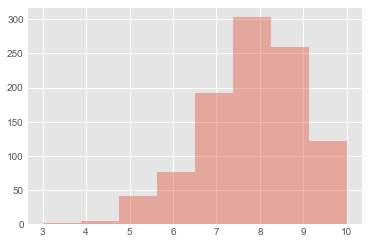

In [584]:
#Generando una distribucion binomial aleatoria con 10 ensayos y como se distribuyen en esos ensayos 1000 aciertos

#x = random.binomial(n = 10 , p = 0.5 , size= 1000 )
x=binom.rvs(n = 10 , p = 0.8 , size= 1000)
sns.distplot (x, hist = True , kde = False,bins=8 )

plt.show ()

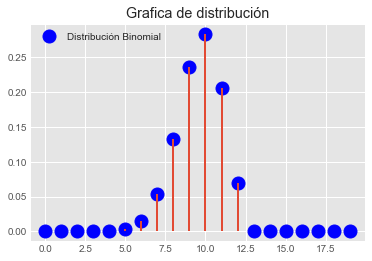

In [585]:
fig,ax =plt.subplots()
v=np.arange(0,20)
x2=binom.pmf(v , n = 12 , p = 0.8 )
ax.plot(v ,x2,'bo',ms=13, label='Distribución Binomial')
ax.set_title('Grafica de distribución')
ax.vlines(v ,0,x2)
x2
ax.legend(loc='upper left',)

###DISTRIBUCIÓN GEOMETRICA, basada en  la probabilidad de cuantas veces se necesita repetir un ensayo para obtener un acierto, se da la probabalidad de obtener un acierto por ensayo


(array(3.33333333), array(7.77777778), array(2.03188864), array(6.12857143))

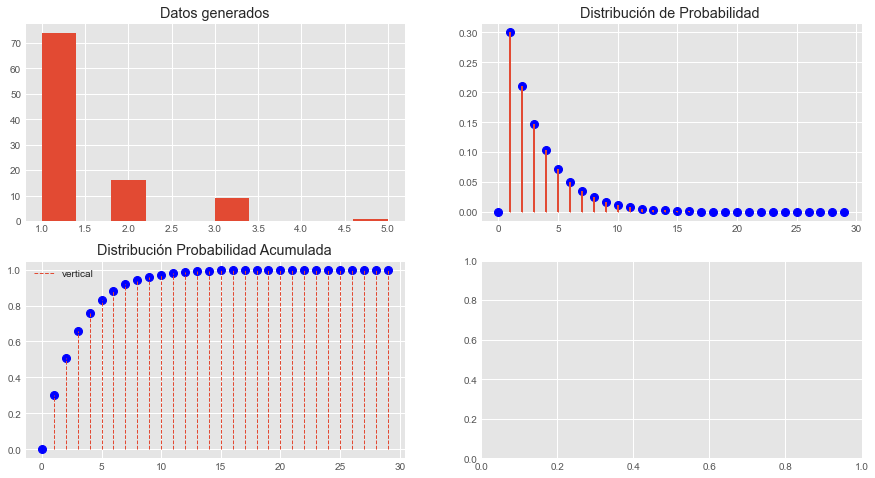

In [586]:
#Distribución geometrica

datosGeo=geom.rvs(0.7,size=100)
datosGeo
fig,ax=plt.subplots(nrows=2,ncols=2 ,figsize=(15, 8))
ax[0,0].hist(datosGeo)
ax[0,0].set_title('Datos generados')

#obteniendo la funcion de distribucion a partir de los datos 
#x=np.arange(geom.ppf(0.01,0.3),geom.ppf(0.99,0.3))
x=np.arange(0,30)# datos de para la distribucin , seran los n ensayos para obtener un acierto 

ax[0,1].plot(x,geom.pmf(x,0.3),'bo', ms=8)

ax[0,1].set_title('Distribución de Probabilidad ')
ax[0,1].vlines(x,0,geom.pmf(x,0.3),lw=1)
ax[0,1].vlines(x,0,geom.pmf(x,0.3),lw=2)

#obteniendo la funcion de distribucion a partir de los datos 

ditAcum=geom.cdf(x,0.3)

ax[1,0].plot(x,ditAcum,'bo',ms=8)
ax[1,0].set_title(label='Distribución Probabilidad Acumulada')
ax[1,0].vlines(x,0,ditAcum,lw=1,linestyles='--',label='vertical')
ax[1,0].legend(loc='best')

#calculando datos estadisticos 
m,v,s,k=geom.stats(0.3,moments='mvsk')
m,v,s,k




In [587]:
print(f"MEDIA= {m} \nVARIANZA= {v}\nSESGO= {s}\nCURTOSIS= {k} ")

MEDIA= 3.3333333333333335 
VARIANZA= 7.777777777777779
SESGO= 2.031888635868469
CURTOSIS= 6.128571428571429 


#DISTRIBUCIÓN HIPERGEOMETRICA
En Python tenemos las funciones del paquete scipy.stats.hypergeom: pmf(k,M, n, N), cdf(k,M, n, N), ppf(q,M, n, N), rvs(M, n, N, size) donde M es el número de objetos del primer tipo, N el número de objetos del segundo tipo y n el número de extracciones realizadas.

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[1.03199174e-04 4.33436533e-03 4.76780186e-02 1.98658411e-01
 3.57585139e-01 2.86068111e-01 9.53560372e-02 1.02167183e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Probabilidad de obtener 7 perros seleccionando 12 animales es : 0.010216718266253871


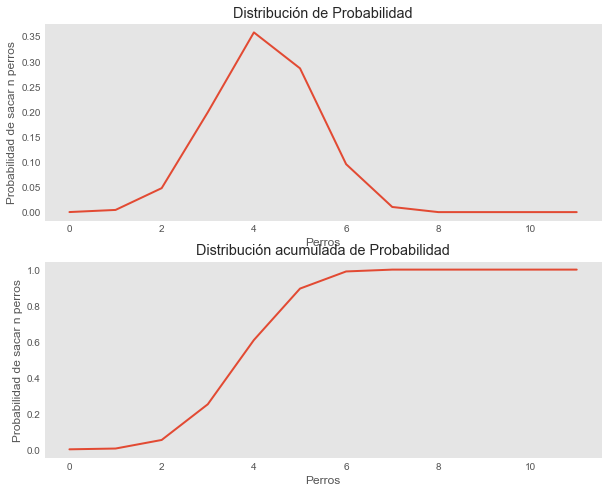

In [588]:
#por ejemplo, calcular la probabilidad de obtener 7 perros de una muestra de 20 animales donde 7 son perros , donde extraemos 12 animales
K=np.arange(12) #LOS VALORES DE LOS QUANTILES DE X QUE TENEMOS COMO BASE PARA CALCULAR LA DISTRIBUCION
M=20 #número de animales
n=12 #números de extracciones
N=7  #números de elementos que se deserian obtener 

print(K)

#calculando la distribuciion completa 
dist=hypergeom.pmf(K,M ,n,N)#el eje de las es x representan las aparaciones o la cantidad de perros 
pro7=hypergeom.pmf(7,M ,n,N)

#distribución acumulada
distACU=hypergeom.cdf(K,M ,n,N)#el eje de las es x representan las aparaciones o la cantidad de perros 
#  
fig,ax=plt.subplots(2, figsize=(10, 8))

ax[0].plot(K,dist)# lo que obtuvimos
ax[0].set_title('Distribución de Probabilidad') 
ax[0].set_xlabel('Perros')
ax[0].set_ylabel('Probabilidad de sacar n perros')
ax[0].grid()

ax[1].plot(K,distACU)# lo que obtuvimos
ax[1].set_title('Distribución acumulada de Probabilidad') 
ax[1].set_xlabel('Perros')
ax[1].set_ylabel('Probabilidad de sacar n perros')
ax[1].grid()



print(dist)
print(f"Probabilidad de obtener 7 perros seleccionando 12 animales es : {pro7}")

#Distribución de Poisson ,  es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos «raros».

In [589]:
#pmf(k,mu),cdf(k,mu),ppf(q,mu),rvs(M,mu) 
# mu=número esperado por unidad de tiempo
#q=quantile
#k=numero de elementos al que se desea calcular la probabilidad



La veterinaria de Jorge recibe un promedio de μ = 4 pacientes por día. Sabiendo que el número de pacientes que llegan en un día sigue una distribución de Poisson, calcular:

a) la probabilidad de que lleguen 3 pacientes en un día.

In [590]:
#a) la probabilidad de que lleguen 3 pacientes en un día.
poisson.pmf(3,4)

0.19536681481316454

In [591]:
#b) la probabilidad de que lleguen 5 pacientes en un día.
poisson.pmf(5,4)

0.1562934518505317

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


C:\Users\daniel\AppData\Local\Temp\ipykernel_2480\3572044211.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(pacientes,dstpro,'bo',ms=8, color='red')


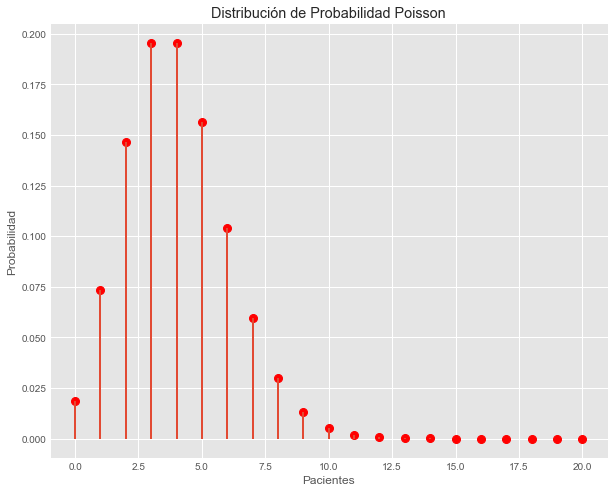

In [592]:
#c)calcule y grafique la distribucion de probabilidad de 0 a 20 pacientes

pacientes=np.arange(0,21)
dstpro=poisson.pmf(pacientes,4)

dstproA=poisson.cdf(pacientes,4)

fig,ax=plt.subplots(figsize=(10, 8))
plt.style.use('ggplot')
ax.plot(pacientes,dstpro,'bo',ms=8, color='red')
ax.vlines(pacientes,0,dstpro)
ax.set_title('Distribución de Probabilidad Poisson')
ax.set_xlabel('Pacientes')
ax.set_ylabel('Probabilidad')
print(plt.style.available)



C:\Users\daniel\AppData\Local\Temp\ipykernel_2480\3504898678.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(pacientes,dstproA,'bo',ms=8, color='red')


Text(0, 0.5, 'Probabilidad')

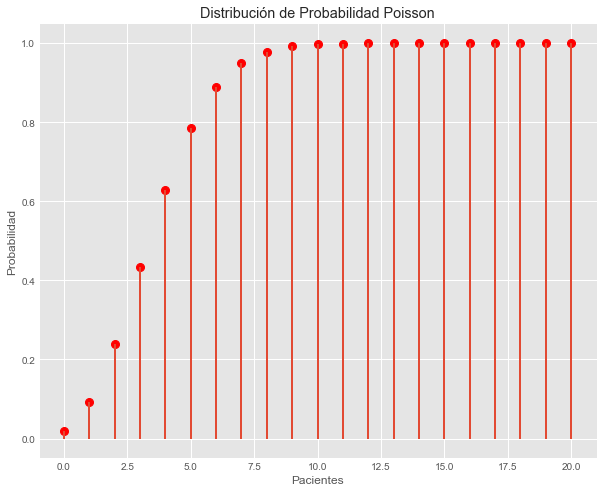

In [593]:
fig,ax=plt.subplots(figsize=(10, 8))
ax.plot(pacientes,dstproA,'bo',ms=8, color='red')
ax.vlines(pacientes,0,dstproA)
ax.set_title('Distribución de Probabilidad Poisson')
ax.set_xlabel('Pacientes')
ax.set_ylabel('Probabilidad')

#DISTRIBUCIÓN BINOMIAL NEGATIVA. 
Determina la probabilidad de obtener un valor  de aciertos en una cantidad de ensayos dados, por ejemplo la probabilidad de obtener 5 aciertos(caras) en 10 repeticiones o lanzamientos de una moneda , sabiendo que la probabilidad de obtener en un lanzamiento cara es de 0,5  


In [594]:
#Si en una tienda tiene 0.8 de p de que llegue 1 mascota al  1 día (el ensayo)  , 
# se puede calcular cual es la probabilidad de que lleguen 70 mascotas en el día 5(ensayo para calcular la p)

p=0.8 #probabilidad que llegue 1 mascota por día
x=5 # número de ensayo posible para obtener 50 mascotas , los ensayos en este caso son los días 
r=50 #número de aciertos por

#la probabilidad de obtener 70 mascotas en el total al 5 día contando desde el día 1 es:

nbinom.pmf(x,r,p)


0.014443792322110509

MEDIA:27.0
 VARIANZA:269.99999999999994
 SESGO:1.1563031769553505
 CURTOSIS:2.0037037037037035


C:\Users\daniel\AppData\Local\Temp\ipykernel_2480\3804907897.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x2,distBN,'bo',ms=8,color='green')
C:\Users\daniel\AppData\Local\Temp\ipykernel_2480\3804907897.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(x2,distBNA,'bo',ms=8,color='green')


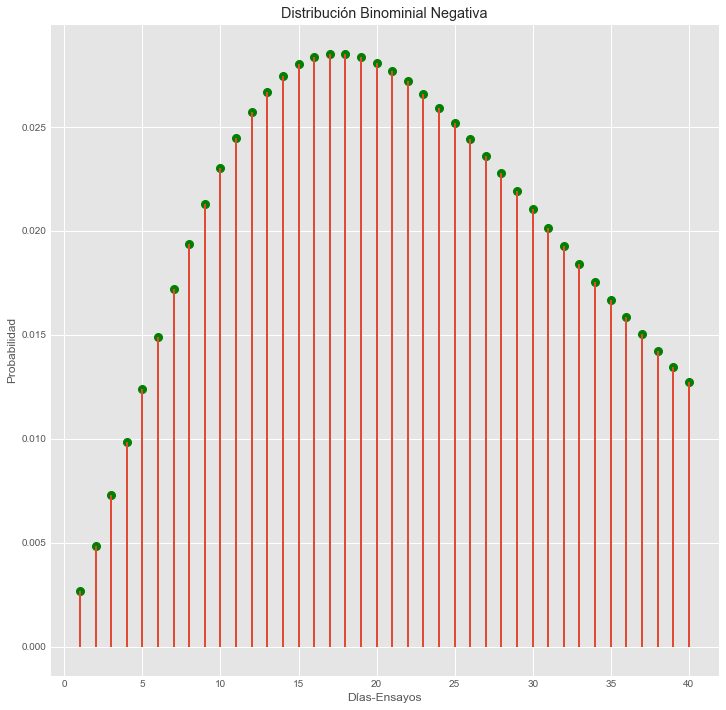

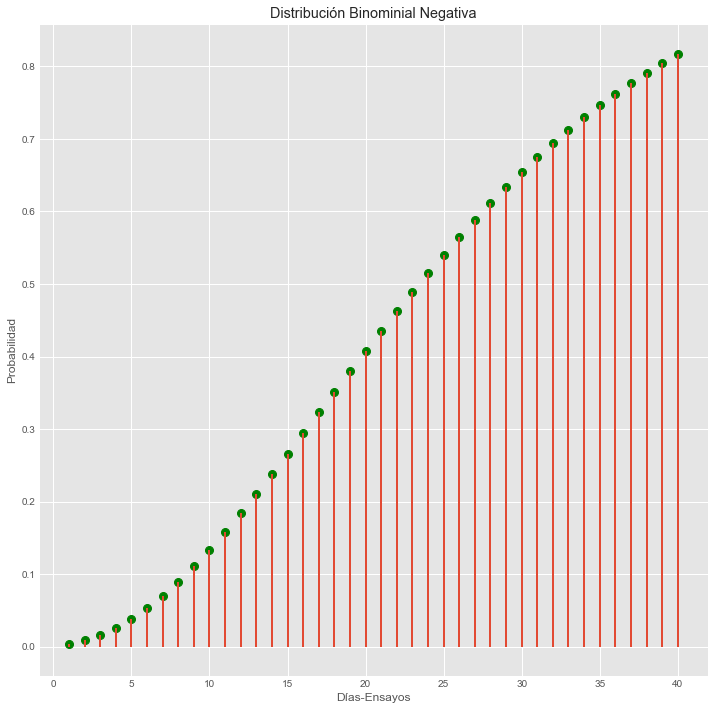

In [595]:
#Cual es la probabilidad de que ocurran 3 tormentas en 40 días , si se conoce que la probabilidad de que ocurra una tormenta al día es de 0.1 

#la probablidad de que ocurran 3 tormentas en 40 días es :
nbinom.pmf(40,3,0.1)

# la distribución binomial para obtener las probabilidas de que ocurran las 3 tormentas despues de los 3 días hasta 40 días se dará por un volor de x[0:30] 

x2=np.arange(1,41)

distBN=nbinom.pmf(x2,3,0.1)
distBNA=nbinom.cdf(x2,3,0.1)

#graficando Distribución o Densidad 

fig,ax=plt.subplots(figsize=(12,12))

ax.set_title('Distribución Binominial Negativa')
ax.set_xlabel('Días-Ensayos')
ax.set_ylabel('Probabilidad')
ax.plot(x2,distBN,'bo',ms=8,color='green')
ax.vlines(x2,0,distBN)

#Graficando Distribución de Probabilidad acumulada

fig,ax2=plt.subplots(figsize=(12,12))

ax2.set_title('Distribución Binominial Negativa')
ax2.set_xlabel('Días-Ensayos')
ax2.set_ylabel('Probabilidad')
ax2.plot(x2,distBNA,'bo',ms=8,color='green')
ax2.vlines(x2,0,distBNA)

#Datos estadisticos generales stats(n, p, loc=0, moments=’mv’)   donde Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’) y n es el número de sucesos

m,v,s,k=nbinom.stats(3,0.1,moments='mvsk')


print(f'MEDIA:{m}\n VARIANZA:{v}\n SESGO:{s}\n CURTOSIS:{k}')


Distribución uniforme continua
En teoría de probabilidad y estadística, la distribución uniforme continua es una familia de distribuciones de probabilidad para variables aleatorias continuas, tales que para cada miembro de la familia, todos los intervalos de igual longitud en la distribución en su rango son igualmente probables.

from scipy.stats import uniform
loc=a
k= valor de dominio
scale=b-a

pdf(k,loc,scale)# probabilidad
cdf(k,loc,scale)#probabilidad acumulada
ppf(q,loc,scale) #probabilida cuantil
rvs(loc=loc,scale=scale,size=size)

array([0.42207392, 0.49980247, 0.31907404, 0.41258262, 0.45408998,
       0.6697934 , 0.55003716, 0.58152399, 0.26623766, 0.67955511,
       0.29840221, 0.68521393, 0.5777626 , 0.66658104, 0.51251934,
       0.68542438, 0.3429168 , 0.44002146, 0.70584757, 0.72318508,
       0.46936358, 0.50367489, 0.4332521 , 0.28826986, 0.61517069,
       0.72004503, 0.36933985, 0.64311328, 0.51642389, 0.27630522,
       0.42046661, 0.41944614, 0.40495097, 0.31197747, 0.71709519,
       0.5330338 , 0.26191416, 0.72719223, 0.72036359, 0.53471376,
       0.57404348, 0.34775671, 0.49481106, 0.3980786 , 0.51395261,
       0.62877946, 0.36027611, 0.26817349, 0.68877946, 0.39327364,
       0.39562014, 0.46371703, 0.67866025, 0.73529589, 0.73494166,
       0.57010151, 0.55844398, 0.66881404, 0.45298446, 0.47929554,
       0.38205262, 0.66292271, 0.42277979, 0.26418065, 0.51352551,
       0.68285306, 0.74643758, 0.59649277, 0.42590852, 0.49339726,
       0.54050077, 0.65922369, 0.32716478, 0.52196149, 0.63719

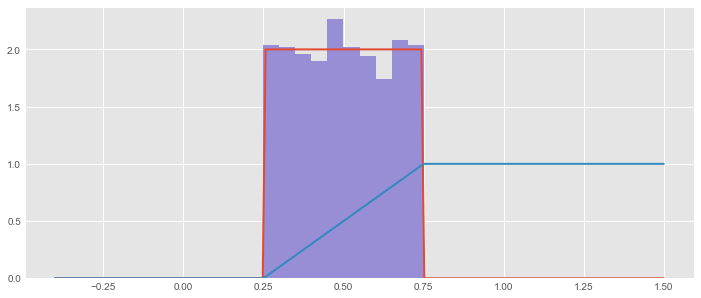

In [596]:
from scipy.stats import uniform

a=0.25 #valores de la minimo y maximo donde la funcion tiene area
b=0.75 # 

rangoX=np.arange(-0.4,1.5,0.009)
#rangoX=np.linspace(-0.4,1.4,100)

loc=a
scale=b-a # rango de función

#la probabilidad para un valor ubicado entre dominio de 0.25 a 0.75

distUni=uniform.pdf(rangoX,loc,scale)

fig,ax=plt.subplots(figsize=(12,5))
ax.plot(rangoX,distUni)

# veamos  la funcion de distribucion acumulada por

distUniAc=uniform.cdf(rangoX,loc,scale)

ax.plot(rangoX,distUniAc)

#si usamos el mismo ragon de funciones  y generamos una distribucion uniforme de de datos aleatorios podemos ver la coincidencia con el rangoX que generamos
distUniAle=uniform.rvs(loc=loc,scale=scale,size=1000)

ax.hist(distUniAle, density=True)
distUniAle

In [597]:
distUniAle

array([0.42207392, 0.49980247, 0.31907404, 0.41258262, 0.45408998,
       0.6697934 , 0.55003716, 0.58152399, 0.26623766, 0.67955511,
       0.29840221, 0.68521393, 0.5777626 , 0.66658104, 0.51251934,
       0.68542438, 0.3429168 , 0.44002146, 0.70584757, 0.72318508,
       0.46936358, 0.50367489, 0.4332521 , 0.28826986, 0.61517069,
       0.72004503, 0.36933985, 0.64311328, 0.51642389, 0.27630522,
       0.42046661, 0.41944614, 0.40495097, 0.31197747, 0.71709519,
       0.5330338 , 0.26191416, 0.72719223, 0.72036359, 0.53471376,
       0.57404348, 0.34775671, 0.49481106, 0.3980786 , 0.51395261,
       0.62877946, 0.36027611, 0.26817349, 0.68877946, 0.39327364,
       0.39562014, 0.46371703, 0.67866025, 0.73529589, 0.73494166,
       0.57010151, 0.55844398, 0.66881404, 0.45298446, 0.47929554,
       0.38205262, 0.66292271, 0.42277979, 0.26418065, 0.51352551,
       0.68285306, 0.74643758, 0.59649277, 0.42590852, 0.49339726,
       0.54050077, 0.65922369, 0.32716478, 0.52196149, 0.63719

Distribución Exponencial
En Teoría de Probabilidad y Estadística, la distribución exponencial es una distribución continua que se utiliza para modelar tiempos de espera para la ocurrencia de un cierto evento. Esta distribución al igual que la distribución geométrica tiene la propiedad de pérdida de memoria
A pesar de la sencillez analítica de sus funciones de definición, la distribución exponencial tiene una gran utilidad práctica ya que podemos considerarla como un modelo adecuado para la distribución de probabilidad del tiempo de espera entre dos hechos que sigan un proceso de Poisson. De hecho la distribución exponencial puede derivarse de un proceso experimental de Poisson con las mismas características que las que enunciábamos al estudiar la distribución de Poisson, pero tomando como variable aleatoria , en este caso, el tiempo que tarda en producirse un hecho

Obviamente, entonces , la variable aleatoria será continua. Por otro lado existe una relación entre el parámetro a de la distribución exponencial , que más tarde aparecerá , y el parámetro de intensidad del proceso l , esta relación es a = l

Al ser un modelo adecuado para estas situaciones tiene una gran utilidad en los siguientes casos:

· Distribución del tiempo de espera entre sucesos de un proceso de Poisson

· Distribución del tiempo que transcurre hasta que se produce un fallo, si se cumple la condición que la probabilidad de producirse un fallo en un instante no depende del tiempo transcurrido .Aplicaciones en fiabilidad y teoría de la supervivencia.

#En python tenemos las funciones del paquete scipy.stats.expon:

pdf(k,scale)
cdf(k,scale)
ppf(a,scale)
rvs(n,scaler)

#scale=media o 1/lambda

Media 0.4
 Varianza 0.16000000000000003 
 Sesgo2.0
 curtosis6.0


1.2770640594149767

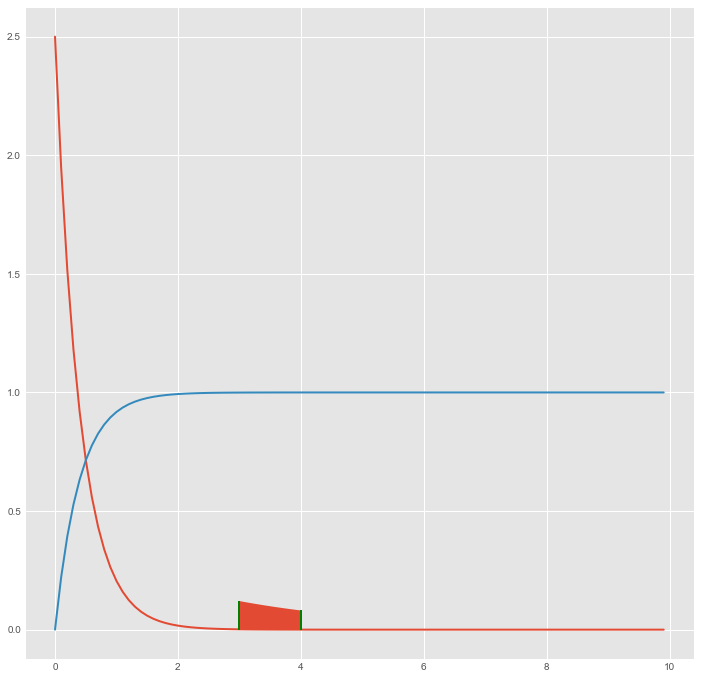

In [601]:
# es importante entender esta definida por el area bajo la curva 
#considere un ejemplo donde un banco atiende 1 cliente y dura en promedio 2,5 minutos 
#para calcular la probabilidad de que un cliente recibe una atencion maximo de 4minutos , para ellos de
#debemos  obtener el area bajo la curva de 0 a 4 minutos ,


from scipy.stats import expon
x = np.arange(0, 10, 0.1)
plt.figure(figsize=(12,12))
plt.plot(x,expon.pdf(x,0,2.5))
plt.plot(x,expon.cdf(x,0,2.5))
#para obtener el area bajo la curva de 0 a 4 debemos entender que todo el area vale 1 
# pero podemos entender que la porbabilidad acumulada hasta un intervalo es tambien el area 
#bajo la curva de densidad de probabilidad por lo que debemos para este caso calular la p acumulada
#que viene a representar la probabilidad de que una persona dure de 0 a 4 minutos en atención
expon.cdf(4,0,2.5)


#Ahora si deseamos calcular la probabilidad  de que un cliente dure en atencion de 3 a 4 minutos en atención
#para esto debemos calcular las dos densidades y restarlas :

f4=expon.cdf(4,0,2.5)
f3=expon.cdf(3,0,2.5)
f4-f3
plt.vlines(3,0,expon.pdf(3,0,2.5),color='green')
plt.vlines(4,0,expon.pdf(4,0,2.5), color='green')

m,v,s,k=expon.stats(loc=0, scale=2.5, moments='mvsk')
print(f'Media {m}\n Varianza {v} \n Sesgo{s}\n curtosis{k}')

#para agregar el area bajo la curva usamos fill_between que genera un area entre funciones definidas
x2=np.arange(3,4.1,0.1)
piso=np.linspace(2,5,100)
funSuperior=expon.pdf(x2,0,2.5)
plt.fill_between(x2,0,funSuperior )
#el x2 es una funcion inferior que hace el piso y los siguientes parametros el inicio de Y 
#y el 3er parametro construye parte de la funcion 


expon.ppf(0.4,0,2.5)